**Adapted by [Scipy Lecture Notes:](http://www.scipy-lectures.org/index.html) Tutorials on the scientific Python ecosystem: a quick introduction to central tools and techniques. The different chapters each correspond to a 1 to 2 hours course with increasing level of expertise, from beginner to expert. This jupyter notebook is devoted to the the Section [1.3.4. Advanced operations](http://www.scipy-lectures.org/intro/numpy/advanced_operations.html) of Numpy chapter.**

# 1.3.4.1. Polynomials


In [1]:
import numpy as np
from matplotlib import pyplot as plt

**NumPy also contains polynomials in different bases:
For example, $3x^2 + 2x - 1$:**

In [2]:
p = np.poly1d([3, 2, -1])
p(0)

-1

In [3]:
p.roots

array([-1.        ,  0.33333333])

In [4]:
p.order

2

In [5]:
x = np.linspace(0, 1, 20)
y = np.cos(x) + 0.3*np.random.rand(20)
p = np.poly1d(np.polyfit(x, y, 3))

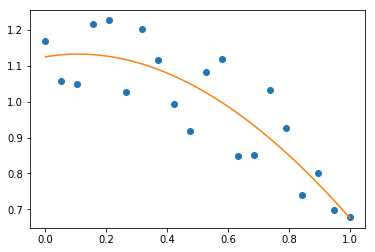

In [6]:
t = np.linspace(0, 1, 200)
plt.plot(x, y, 'o', t, p(t), '-') 
plt.show()

**See http://docs.scipy.org/doc/numpy/reference/routines.polynomials.poly1d.html for more.**

**More polynomials (with more bases)**

**NumPy also has a more sophisticated polynomial interface, which supports e.g. the Chebyshev basis.
$3x^2 + 2x - 1$:**

In [7]:
p = np.polynomial.Polynomial([-1, 2, 3]) # coefs in different order!
p(0)

-1.0

In [8]:
p.roots()

array([-1.        ,  0.33333333])

In [9]:
p.degree()  # In general polynomials do not always expose 'order'

2

**Example using polynomials in Chebyshev basis, for polynomials in range [-1, 1]:**

In [10]:
x = np.linspace(-1, 1, 2000)
y = np.cos(x) + 0.3*np.random.rand(2000)
p = np.polynomial.Chebyshev.fit(x, y, 90)

In [11]:
t = np.linspace(-1, 1, 200)

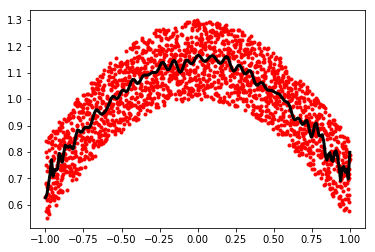

In [12]:
plt.plot(x, y, 'r.')   
plt.plot(t, p(t), 'k-', lw=3)
plt.show()

**The Chebyshev polynomials have some advantages in interpolation.**

## 1.3.4.2. Loading data files

**Text files**

**Example: populations.txt:**

 year | hare |   lynx |   carrot 
 -----|------|--------|---------
1900   | 30e3 |   4e3 |    48300
1901  |  47.2e3 | 6.1e3 |  48200
1902  |  70.2e3 | 9.8e3  | 41500
1903  |  77.4e3 | 35.2e3 | 38200
 

In [13]:
data = np.loadtxt('data/populations.txt')
data    

array([[ 1900., 30000.,  4000., 48300.],
       [ 1901., 47200.,  6100., 48200.],
       [ 1902., 70200.,  9800., 41500.],
       [ 1903., 77400., 35200., 38200.],
       [ 1904., 36300., 59400., 40600.],
       [ 1905., 20600., 41700., 39800.],
       [ 1906., 18100., 19000., 38600.],
       [ 1907., 21400., 13000., 42300.],
       [ 1908., 22000.,  8300., 44500.],
       [ 1909., 25400.,  9100., 42100.],
       [ 1910., 27100.,  7400., 46000.],
       [ 1911., 40300.,  8000., 46800.],
       [ 1912., 57000., 12300., 43800.],
       [ 1913., 76600., 19500., 40900.],
       [ 1914., 52300., 45700., 39400.],
       [ 1915., 19500., 51100., 39000.],
       [ 1916., 11200., 29700., 36700.],
       [ 1917.,  7600., 15800., 41800.],
       [ 1918., 14600.,  9700., 43300.],
       [ 1919., 16200., 10100., 41300.],
       [ 1920., 24700.,  8600., 47300.]])

In [14]:
np.savetxt('pop2.txt', data)
data2 = np.loadtxt('pop2.txt')

**Note If you have a complicated text file, what you can try are:
np.genfromtxt Using Python’s I/O functions and e.g. regexps for parsing (Python is quite well suited for this)**


**IPython Commands:**

**Navigating the filesystem with IPython:**

In [15]:
# pwd      # show current directory

In [16]:
# cd "Path of Folder"

In [17]:
# ls

**Images**  
**Using Matplotlib:**

In [18]:
img = plt.imread('images/elephant1.png')
img.shape, img.dtype

((600, 800, 4), dtype('float32'))

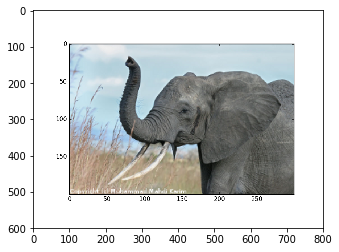

In [19]:
plt.imshow(img) 
plt.show()

In [20]:
# plt.savefig('plot.png')
# plt.imsave('red_elephant.png', img[:,:,0], cmap=plt.cm.gray)

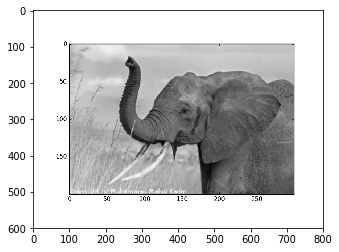

In [21]:
# This saved only one channel (of RGB):
plt.imshow(plt.imread('red_elephant.png'))  
plt.show()

**Other libraries:**

/Users/hhaji/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  


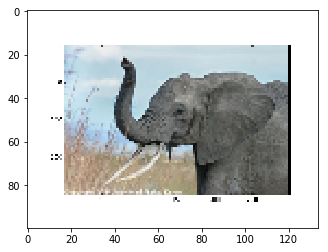

In [22]:
from scipy.misc import imsave
imsave('tiny_elephant.png', img[::6,::6])
plt.imshow(plt.imread('tiny_elephant.png'), interpolation='nearest') 
plt.show()

In [23]:
# NumPy has its own binary format, not portable but with efficient I/O:
data = np.ones((3, 3))
np.save('pop.npy', data)
data3 = np.load('pop.npy')

**Well-known (& more obscure) file formats**

- HDF5: h5py, PyTables
- NetCDF: scipy.io.netcdf_file, netcdf4-python, …
- Matlab: scipy.io.loadmat, scipy.io.savemat
- MatrixMarket: scipy.io.mmread, scipy.io.mmwrite
- IDL: scipy.io.readsav  
… if somebody uses it, there’s probably also a Python library for it.

> **Exercise: Text data files**  
Write a Python script that loads data from populations.txt and drop the last column and the first 5 rows. Save the smaller dataset to pop2.txt.

**NumPy internals**  
If you are interested in the NumPy internals, there is a good discussion in [Advanced NumPy](http://www.scipy-lectures.org/advanced/advanced_numpy/index.html#advanced-numpy).